# Exploring the penguin data

This notebook will use the **Palmer Archipelago (Antarctica) penguin data** which is seen as a replacement for the Iris dataset.

The original data is available from: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data and is also described at: https://github.com/allisonhorst/palmerpenguins/blob/main/README.md, though the exploration there is in R. 

This notebook will use the original data files found at Kaggle, rather than the amended dataset described on Allison's page.

The data represent measurements taken from three different species of penguin, Chinstrap, Gentoo and Adélie. The original research was looking at sexual dimorphism and environmental variability in these three penguin species.

![Penguins “Artwork by @allison_horst”.](images/lter_penguins.png)

Artwork by @allison_horst

## Acknowledgements 

This notebook is based on the original Penguin ones produced by Colin Blackburn. 
- 31 Mar 2021, 07:44

Updated 13/04/2025

## Palmer Archipelago (Antarctica) penguin data

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Thank you to Dr. Gorman, Palmer Station LTER and the LTER Network! Special thanks to Marty Downs (Director, LTER Network Office) for help regarding the data license & use.
License & citation

    Data are available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.

    Please cite this data using: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

#### Summary:

The data folder contains two CSV files:

    penguins_size.csv: 
        Simplified data from original penguin data sets. Contains variables:
            species: penguin species (Chinstrap, Adélie, or Gentoo)
            culmen_length_mm: culmen length (mm)
            culmen_depth_mm: culmen depth (mm)
            flipper_length_mm: flipper length (mm)
            body_mass_g: body mass (g)
            island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
            sex: penguin sex

    penguins_lter.csv: 
        Original combined data for 3 penguin species (aggregated from the original data - see "Links to original data & metadata" on Kaggle page)
    
    
This notebook will use the penguins_size.csv dataset.

## Explore and import the data

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns

In [92]:
!ls data

penguins_lter.csv  penguins_size.csv


In [93]:
chardet.detect(open('data/penguins_size.csv', 'rb').read())

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [94]:
chardet.detect(open('data/penguins_lter.csv', 'rb').read())

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [95]:
penguins_df = pd.read_csv('data/penguins_size.csv')
penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


According to the data citations the file contains data about three penguin species. Best to check:

In [96]:
penguins_df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

For this exploration we will look at species, culmen length, culmen depth, flipper length, body mass and sex. We will put each species in its own dataframe and will extract those columns, rename some columns see the image below) and change the species name to a single word for each dataframe.

![Penguins “Artwork by @allison_horst”.](images/culmen_depth.png)

In [97]:
# put them into three separate dataframes

adelie_df = penguins_df[penguins_df["species"]== 'Adelie']
chinstrap_df = penguins_df[penguins_df["species"]== 'Chinstrap']
gentoo_df = penguins_df[penguins_df["species"]== 'Gentoo']

adelie_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Reshape the dataframes to pick out the required data and make the column names more meaningful.

In [98]:
adelie_df = adelie_df[[
    'species', 'culmen_length_mm', 'culmen_depth_mm',
    'flipper_length_mm', 'body_mass_g', 'sex']].copy()
adelie_df.columns = ['Species', 'Bill Length', 'Bill Depth',
                     'Flipper Length', 'Body Mass', 'Sex']
adelie_df.replace('Adelie Penguin (Pygoscelis adeliae)', 'Adelie', inplace=True)
adelie_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,NaN,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE


It look like not all rows are complete, how many are there?

In [99]:
adelie_df[adelie_df.isnull().any(axis=1)]

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
3,Adelie,NaN,NaN,NaN,NaN,NaN
8,Adelie,34.1,18.1,193.0,3475.0,NaN
9,Adelie,42.0,20.2,190.0,4250.0,NaN
10,Adelie,37.8,17.1,186.0,3300.0,NaN
11,Adelie,37.8,17.3,180.0,3700.0,NaN
47,Adelie,37.5,18.9,179.0,2975.0,NaN


Where the sex is not given let's set it to UNKNOWN and then drop the row that has no usable data

In [100]:
adelie_df['Sex'] = adelie_df['Sex'].fillna('UNKNOWN')
adelie_df[adelie_df.isnull().any(axis=1)]

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
3,Adelie,NaN,NaN,NaN,NaN,UNKNOWN


In [101]:
adelie_df.dropna(inplace=True)
adelie_df.head(10)

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,39.3,20.6,190.0,3650.0,MALE
6,Adelie,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,39.2,19.6,195.0,4675.0,MALE
8,Adelie,34.1,18.1,193.0,3475.0,UNKNOWN
9,Adelie,42.0,20.2,190.0,4250.0,UNKNOWN
10,Adelie,37.8,17.1,186.0,3300.0,UNKNOWN


Check that the Sex column is as we expect.

In [102]:
adelie_df['Sex'].unique()

array(['MALE', 'FEMALE', 'UNKNOWN'], dtype=object)

Now do all of those steps for the Gentoo dataframe.

In [103]:
gentoo_df = gentoo_df[[
    'species', 'culmen_length_mm', 'culmen_depth_mm',
    'flipper_length_mm', 'body_mass_g', 'sex']].copy()
gentoo_df.columns = ['Species', 'Bill Length', 'Bill Depth',
                     'Flipper Length', 'Body Mass', 'Sex']
gentoo_df.replace('Gentoo penguin (Pygoscelis papua)', 'Gentoo', inplace=True)
gentoo_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
220,Gentoo,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,47.6,14.5,215.0,5400.0,MALE


In [104]:
gentoo_df[gentoo_df.isnull().any(axis=1)]

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
246,Gentoo,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,NaN,NaN,NaN,NaN,NaN


In [105]:
gentoo_df['Sex'] = gentoo_df['Sex'].fillna('UNKNOWN')
gentoo_df[gentoo_df.isnull().any(axis=1)]

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
339,Gentoo,NaN,NaN,NaN,NaN,UNKNOWN


In [106]:
gentoo_df.dropna(inplace=True)
gentoo_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
220,Gentoo,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,47.6,14.5,215.0,5400.0,MALE


In [107]:
gentoo_df['Sex'].unique()

array(['FEMALE', 'MALE', 'UNKNOWN', '.'], dtype=object)

In this case we have rows with the Sex set to '.', how many?

In [108]:
gentoo_df[gentoo_df['Sex'] == '.']

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
336,Gentoo,44.5,15.7,217.0,4875.0,.


Set it to UNKNOWN

In [109]:
gentoo_df.at[336, 'Sex'] = 'UNKNOWN'
gentoo_df['Sex'].unique()

array(['FEMALE', 'MALE', 'UNKNOWN'], dtype=object)

In [110]:
gentoo_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
220,Gentoo,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,47.6,14.5,215.0,5400.0,MALE


In [111]:
gentoo_df = gentoo_df.reset_index(drop=True)

And again for the Chinstrap.

In [112]:
chinstrap_df = chinstrap_df[[
    'species', 'culmen_length_mm', 'culmen_depth_mm',
    'flipper_length_mm', 'body_mass_g', 'sex']].copy()
chinstrap_df.columns = ['Species', 'Bill Length', 'Bill Depth',
                     'Flipper Length', 'Body Mass', 'Sex']
chinstrap_df.replace('Chinstrap penguin (Pygoscelis antarctica)', 'Chinstrap', inplace=True)
chinstrap_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
152,Chinstrap,46.5,17.9,192.0,3500.0,FEMALE
153,Chinstrap,50.0,19.5,196.0,3900.0,MALE
154,Chinstrap,51.3,19.2,193.0,3650.0,MALE
155,Chinstrap,45.4,18.7,188.0,3525.0,FEMALE
156,Chinstrap,52.7,19.8,197.0,3725.0,MALE


In [113]:
chinstrap_df[chinstrap_df.isnull().any(axis=1)]

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex


In [114]:
chinstrap_df['Sex'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [115]:
chinstrap_df = chinstrap_df.reset_index(drop=True)
chinstrap_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Chinstrap,46.5,17.9,192.0,3500.0,FEMALE
1,Chinstrap,50.0,19.5,196.0,3900.0,MALE
2,Chinstrap,51.3,19.2,193.0,3650.0,MALE
3,Chinstrap,45.4,18.7,188.0,3525.0,FEMALE
4,Chinstrap,52.7,19.8,197.0,3725.0,MALE


This dataset is complete!

### A quick look at the differences across the three species

In [116]:
adelie_df.describe()

,Bill Length,Bill Depth,Flipper Length,Body Mass
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [117]:
gentoo_df.describe()

,Bill Length,Bill Depth,Flipper Length,Body Mass
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [118]:
chinstrap_df.describe()

,Bill Length,Bill Depth,Flipper Length,Body Mass
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


### Plot the features by sex for each species

We can produce a histogram for a given species and feature to visualise the diffences we can see above in the data. Here is one for the bill depth of Gentoo penguins.

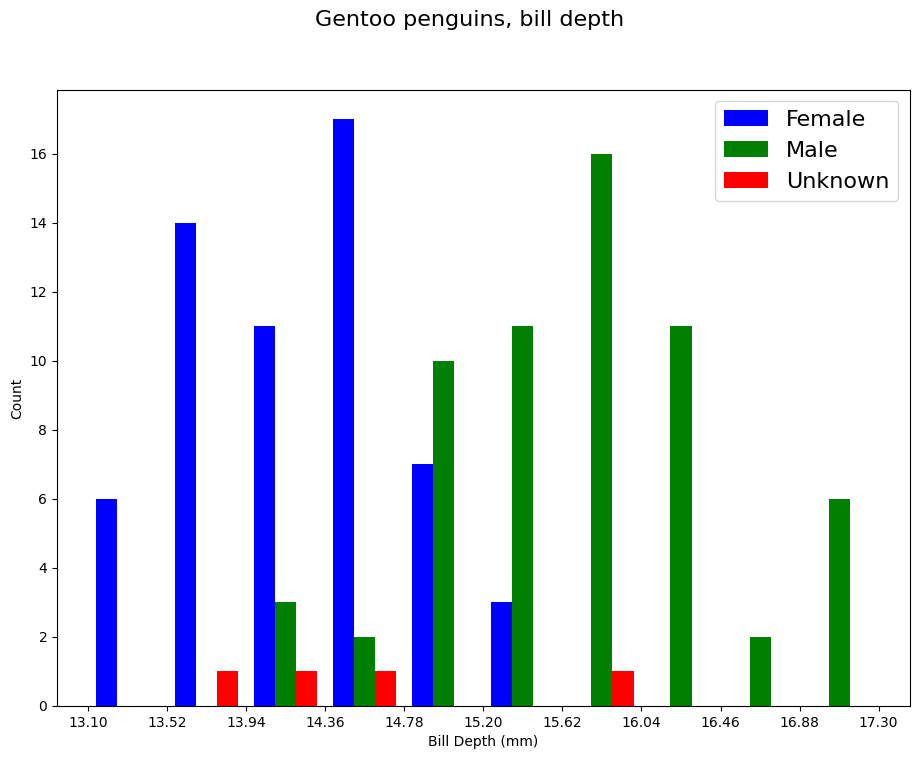

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
fig.suptitle('Gentoo penguins, bill depth', fontsize=16)

colors = ['blue', 'green', 'red']
labels = ['Female', 'Male', 'Unknown']
data = [gentoo_df[gentoo_df['Sex']=='FEMALE']['Bill Depth'],
        gentoo_df[gentoo_df['Sex']=='MALE']['Bill Depth'],
        gentoo_df[gentoo_df['Sex']=='UNKNOWN']['Bill Depth']]
n, bins, patches = ax.hist(data, histtype='bar', color=colors, label=labels)
ax.legend(prop={'size': 16})
ax.set_xlabel('Bill Depth (mm)')
ax.set_ylabel('Count')
ax.set_xticks(bins)

plt.show()
pass

From a first look the bill depth seems smaller for the female Gentoo penguins. 

Things to think about, will the other penguins and features have a similar pattern? Looking for the patterns can help determine what the unknowns are.

It would be tedious to produce a chart for each feature of each species, instead we can create a function to produce a combined figure for each species. This uses and inner function to produce each subplot.

This compromises a bit on readability but is okay for this investigative visualisation.

In [120]:
def species_histograms(df):
    # Use an inner function for each separate plot
    def subplot(ax, df, column, column_label):
        colors = ['blue', 'green', 'red']
        labels = ['Female', 'Male', 'Unknown']
        data = [df[df['Sex']=='FEMALE'][column],
                df[df['Sex']=='MALE'][column],
                df[df['Sex']=='UNKNOWN'][column]]
        n, bins, patches = ax.hist(data, histtype='bar', color=colors, label=labels)
        ax.legend(prop={'size': 8})
        ax.set_xlabel(column_label)
        ax.set_ylabel('Count')
        ax.set_xticks(bins)
        # This rounding means the labels are approximate
        tick_labels = [str(round(x, 1)) for x in bins]
        ax.set_xticklabels(tick_labels, fontdict={'fontsize': 7})

    fig, axs = plt.subplots(2, 2)

    subplot(axs[0, 0], df, 'Bill Length', 'Bill Length (mm)')
    subplot(axs[0, 1], df, 'Bill Depth', 'Bill Depth (mm)')
    subplot(axs[1, 0], df, 'Flipper Length', 'Flipper Length (mm)')
    subplot(axs[1, 1], df, 'Body Mass', 'Body Mass (g)')

    fig.set_size_inches(11, 8)
    fig.suptitle('Features of '+df.at[0, 'Species']+' penguins by sex', fontsize=16)
    fig.tight_layout(pad=3.0)

    plt.show()

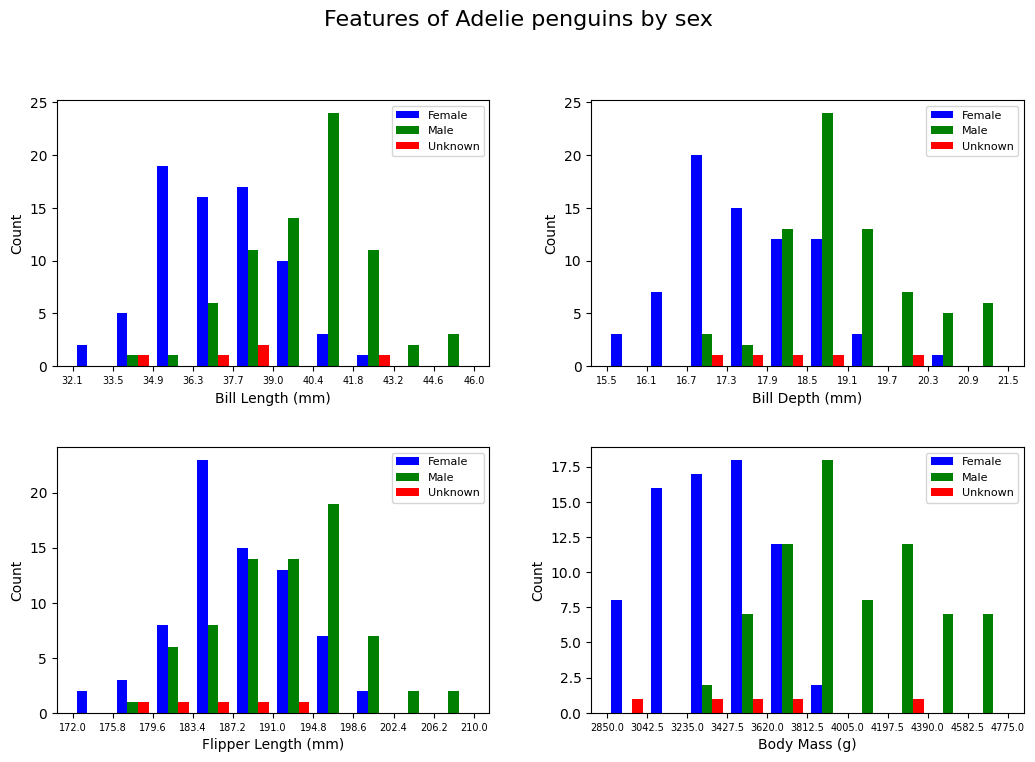

In [121]:
species_histograms(adelie_df)

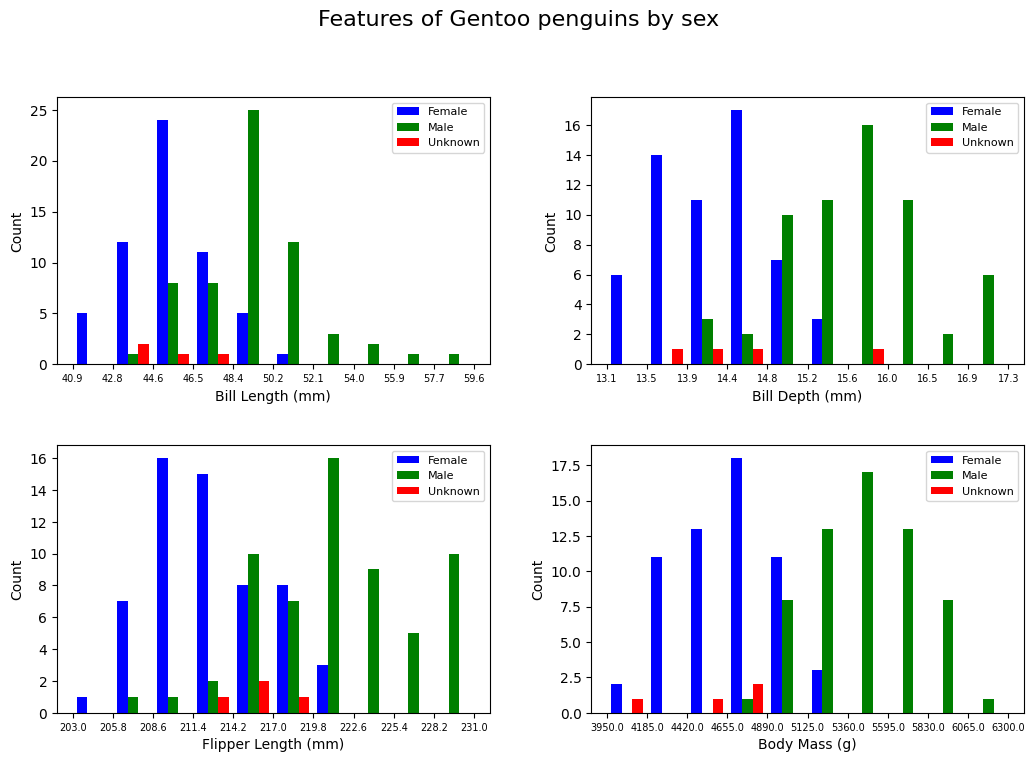

In [122]:
species_histograms(gentoo_df)

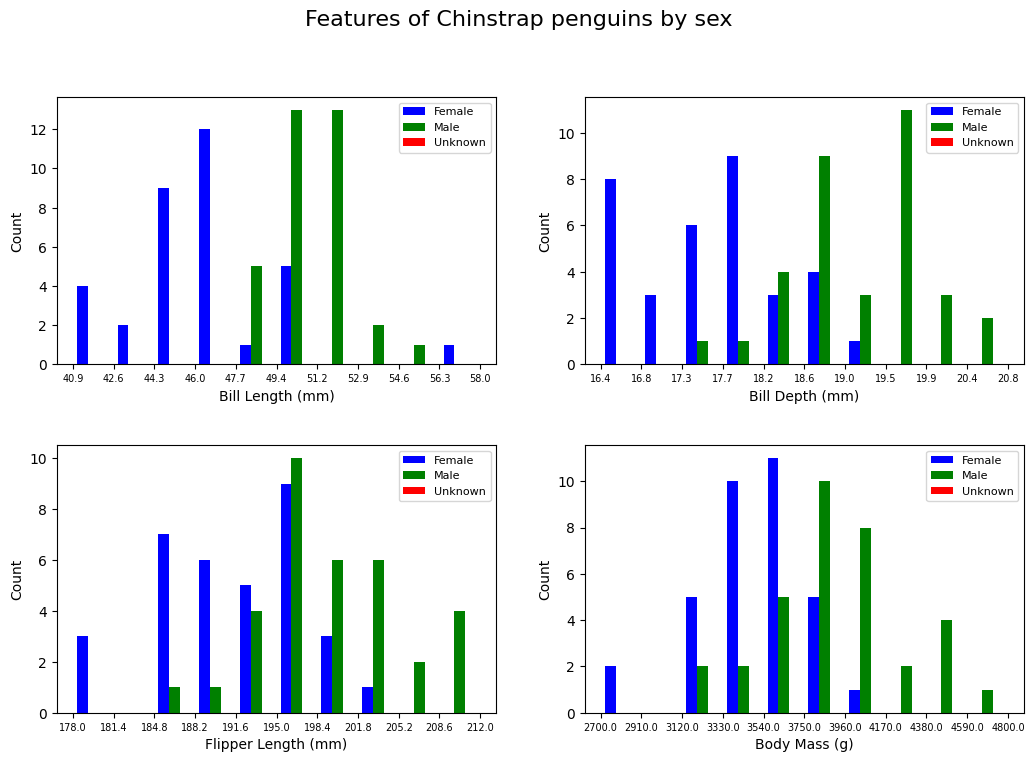

In [123]:
species_histograms(chinstrap_df)

There are clearly differences between the two sexes for all of the features. In general the males are larger than the females for each measurement. This could let us try to determine the sex of the penguins recorded as being unknown. 

The one odd value is a single record of a female Chinstrap penguin which has a bill length larger than that of any male and an outlier on the other female data. Since there isn't a similar anomalous value for each of the other features it seems unlikely that the sex has been mis-recorded. In this case either the measurement was made or recorded incorrectly or there was a female chinstrap penguin with a very long bill! It would be worth looking at the original paper to see if this is remarked upon.

#### Save the cleaned and reduced data by species

In [124]:
adelie_df.to_csv('data/adelie.csv', index=False)
gentoo_df.to_csv('data/gentoo.csv', index=False)
chinstrap_df.to_csv('data/chinstrap.csv', index=False)

### Combine the data and then compare features by sex for each species.

In [125]:
# axis=0 for vertical concatenation
penguins_df = adelie_df.copy()
penguins_df = pd.concat([penguins_df, gentoo_df], axis=0, ignore_index=True)
penguins_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [126]:
penguins_df.tail()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
269,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
270,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
271,Gentoo,50.4,15.7,222.0,5750.0,MALE
272,Gentoo,45.2,14.8,212.0,5200.0,FEMALE
273,Gentoo,49.9,16.1,213.0,5400.0,MALE


In [127]:
penguins_df = pd.concat([penguins_df, chinstrap_df], axis=0, ignore_index=True)
penguins_df.tail()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
337,Chinstrap,55.8,19.8,207.0,4000.0,MALE
338,Chinstrap,43.5,18.1,202.0,3400.0,FEMALE
339,Chinstrap,49.6,18.2,193.0,3775.0,MALE
340,Chinstrap,50.8,19.0,210.0,4100.0,MALE
341,Chinstrap,50.2,18.7,198.0,3775.0,FEMALE


In [128]:
males_df = penguins_df[penguins_df['Sex']=='MALE'].copy().reset_index(drop=True)
males_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.3,20.6,190.0,3650.0,MALE
2,Adelie,39.2,19.6,195.0,4675.0,MALE
3,Adelie,38.6,21.2,191.0,3800.0,MALE
4,Adelie,34.6,21.1,198.0,4400.0,MALE


In [129]:
females_df = penguins_df[penguins_df['Sex']=='FEMALE'].copy().reset_index(drop=True)
females_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.5,17.4,186.0,3800.0,FEMALE
1,Adelie,40.3,18.0,195.0,3250.0,FEMALE
2,Adelie,36.7,19.3,193.0,3450.0,FEMALE
3,Adelie,38.9,17.8,181.0,3625.0,FEMALE
4,Adelie,41.1,17.6,182.0,3200.0,FEMALE


In [130]:
unknowns_df = penguins_df[penguins_df['Sex']=='UNKNOWN'].copy().reset_index(drop=True)
unknowns_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,34.1,18.1,193.0,3475.0,UNKNOWN
1,Adelie,42.0,20.2,190.0,4250.0,UNKNOWN
2,Adelie,37.8,17.1,186.0,3300.0,UNKNOWN
3,Adelie,37.8,17.3,180.0,3700.0,UNKNOWN
4,Adelie,37.5,18.9,179.0,2975.0,UNKNOWN


#### Save the cleaned and reduced data as a single file and by sex 

In [131]:
penguins_df.to_csv('data/penguins.csv', index=False)
males_df.to_csv('data/males.csv', index=False)
females_df.to_csv('data/females.csv', index=False)
unknowns_df.to_csv('data/unknowns.csv', index=False)

### Which chart?

Deciding which type of chart is important to visualise the data. The above charts were all bar charts and appropriate for showing the different features of the penguins.

What if we wanted to compare two features, such as the Bill Length and Bill Depth for all three species, is a bar chart still appropriate?

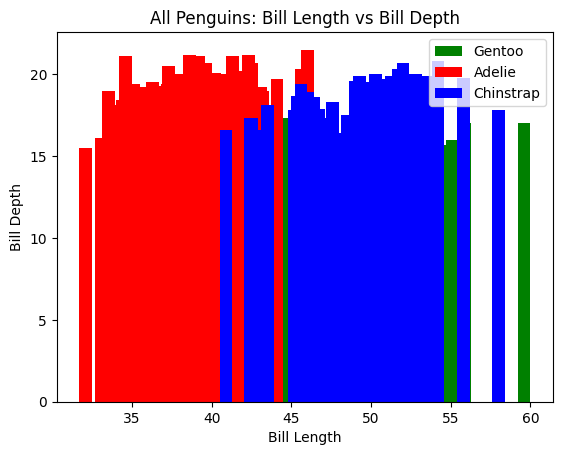

In [132]:
# Plot the data points which correspond to each penguin for two features using a bar chart
colors = {'Gentoo': 'green', 'Adelie': 'red', 'Chinstrap': 'blue'}
for species in colors.keys(): 
    plt.bar(
        penguins_df[penguins_df['Species']==species]['Bill Length'],
        penguins_df[penguins_df['Species']==species]['Bill Depth'],
        color=colors[species], label=species)
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('All Penguins: Bill Length vs Bill Depth')
plt.legend()
plt.plot()
pass

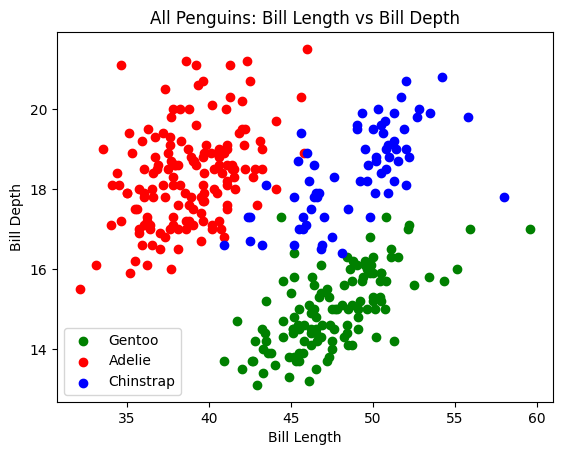

In [133]:
# Same again, but this time using a scatter plot
colors = {'Gentoo': 'green', 'Adelie': 'red', 'Chinstrap': 'blue'}
for species in colors.keys(): 
    plt.scatter(
        penguins_df[penguins_df['Species']==species]['Bill Length'],
        penguins_df[penguins_df['Species']==species]['Bill Depth'],
        color=colors[species], label=species)
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('All Penguins: Bill Length vs Bill Depth')
plt.legend()
plt.plot()
pass

Which plot was better for this?

The three species clearly have some differences using these two features but there is some overlap. We've already seen that the range of the measurements of each feature varies by sex so further investigations could compare the features for each sex separately.


Scatter plots are not always the answer when comparing two values. Let's look at the other file: penguins_lter. It contains data about the islands they live on and the "Date Egg", which according to the metadata of the original dataset: https://portal.edirepository.org/nis/metadataviewer?packageid=knb-lter-pal.221.6
is: "*Date study nest observed with 1 egg (sampled)*"

In [134]:
penguinsLt_df = pd.read_csv('data/penguins_lter.csv')
penguinsLt_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [135]:
#update to shorter Species names
penguinsLt_df.replace('Adelie Penguin (Pygoscelis adeliae)', 'Adelie', inplace=True)
penguinsLt_df.replace('Chinstrap penguin (Pygoscelis antarctica)', 'Chinstrap', inplace=True)
penguinsLt_df.replace('Gentoo penguin (Pygoscelis papua)', 'Gentoo', inplace=True)
penguinsLt_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [136]:
# Check if any other values and what Islands there are
print(penguinsLt_df['Species'].unique())
print(penguinsLt_df['Island'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


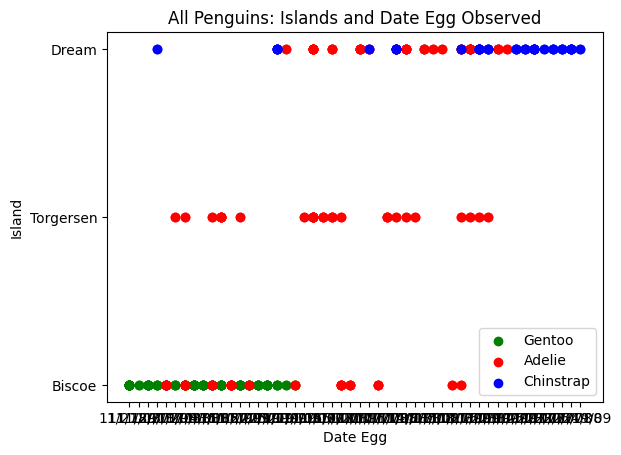

In [137]:
# I'm interested in what islands the penguins live on and the dates observed:
colors = {'Gentoo': 'green', 'Adelie': 'red', 'Chinstrap': 'blue'}
for species in colors.keys(): 
    plt.scatter(
        penguinsLt_df[penguinsLt_df['Species']==species]['Date Egg'],
        penguinsLt_df[penguinsLt_df['Species']==species]['Island'],
        color=colors[species], label=species)

    plt.xlabel('Date Egg')
plt.ylabel('Island')
plt.title('All Penguins: Islands and Date Egg Observed')
plt.legend()
plt.plot()
pass

Hmmm, not the best use of a scatter plot! Perhaps the date is not a good value for a scatter plot. Let's look at what values there are:

In [138]:
print(penguinsLt_df['Date Egg'].unique())

['11/11/07' '11/16/07' '11/15/07' '11/9/07' '11/12/07' '11/10/07'
 '11/13/07' '11/19/07' '11/6/08' '11/9/08' '11/15/08' '11/13/08'
 '11/11/08' '11/14/08' '11/8/08' '11/2/08' '11/7/08' '11/17/08' '11/5/08'
 '11/10/08' '11/9/09' '11/15/09' '11/20/09' '11/12/09' '11/17/09'
 '11/18/09' '11/22/09' '11/16/09' '11/21/09' '11/23/09' '11/10/09'
 '11/13/09' '11/14/09' '11/26/07' '11/21/07' '11/28/07' '11/22/07'
 '11/30/07' '12/3/07' '11/25/08' '11/24/08' '11/27/09' '11/19/09'
 '11/27/07' '11/18/07' '11/29/07' '11/4/08' '11/3/08' '11/25/09' '12/1/09']


Some aggregation might be better here - one for further work......

## Data Mining 

Our analysis will now look at using data mining techniques.

For the EMA you must use either K-NN or K-Means within your investigation.

## Clustering the penguin data

In [139]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

Clustering is a data mining method that attempts to classify a new data point into a set of previously classified data. It is useful if we have some previously classified data to use for training the model, but we have new data that we do not know its classification.

E.g., predicting if a new patient is likely to have a heart problem, based on their health record. 

Clustering is about uncovering missing data and used where we want to make predictions about the data.

When a prediction is required, the k-most similar records to a new record from the training dataset are located. From these neighbors, a summarized prediction is made. (Brownlee, 2020)

E.g., Hospital has other patient data to help classify new patients into at risk or not at risk category of having a heart problem.

In this case we can use the known penguins to try and classify our unknown penguins. There seems to be differences between the males and females of the species, so lets split them into two groups.

In [140]:
males_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.3,20.6,190.0,3650.0,MALE
2,Adelie,39.2,19.6,195.0,4675.0,MALE
3,Adelie,38.6,21.2,191.0,3800.0,MALE
4,Adelie,34.6,21.1,198.0,4400.0,MALE


In [141]:
females_df = penguins_df[penguins_df['Sex']=='FEMALE'].copy().reset_index(drop=True)
females_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.5,17.4,186.0,3800.0,FEMALE
1,Adelie,40.3,18.0,195.0,3250.0,FEMALE
2,Adelie,36.7,19.3,193.0,3450.0,FEMALE
3,Adelie,38.9,17.8,181.0,3625.0,FEMALE
4,Adelie,41.1,17.6,182.0,3200.0,FEMALE


In [142]:
females_df = penguins_df[penguins_df['Sex']=='FEMALE'].copy().reset_index(drop=True)

Use a couple of keys (set as variables to other can be tried)

In [143]:
key1 = 'Bill Length'
key2 = 'Bill Depth'

In [144]:
# Create an instance of the clusterer with k=2
kmeans2 = KMeans(n_clusters=2)
clusteringData_df = males_df[[key1, key2]]

# Call the fit function on the clusterer to fit the data to the 2 means.
clusteringData_df.head()

,Bill Length,Bill Depth
0,39.1,18.7
1,39.3,20.6
2,39.2,19.6
3,38.6,21.2
4,34.6,21.1


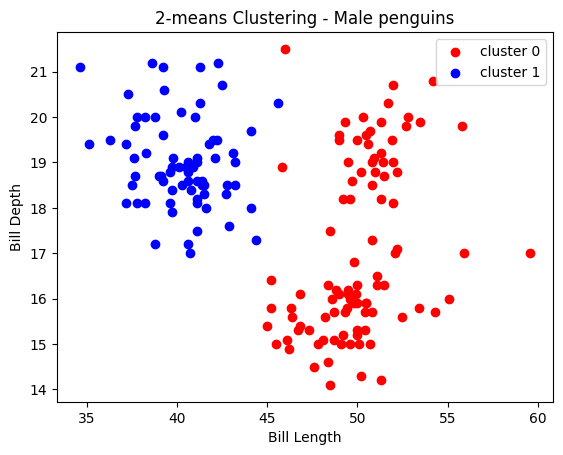

In [145]:
# Call the fit function on the clusterer to fit the data to the 2 means.
assignedClusters_clust = kmeans2.fit(clusteringData_df)

# Plot the data points which in the cluster labelled '0'
plt.scatter(males_df[key1][assignedClusters_clust.labels_==0],
            males_df[key2][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(males_df[key1][assignedClusters_clust.labels_==1],
            males_df[key2][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

plt.legend()

plt.xlabel(key1)
plt.ylabel(key2)

plt.title('2-means Clustering - Male penguins')

plt.plot()
pass

Could this be improved by increasing the clusters? We know there are three types of species, so lets try 3:

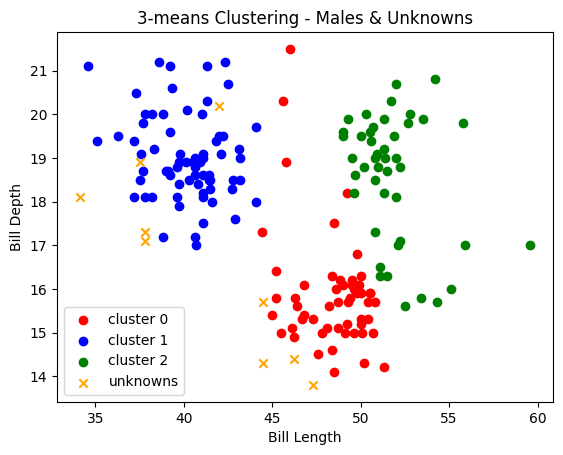

In [146]:
# Create an instance of the clusterer with k=3
kmeans3 = KMeans(n_clusters=3)
# Call the fit function on the clusterer to fit the data to the 2 means.
assignedClusters_clust = kmeans3.fit(clusteringData_df)

# Plot the data points which in the cluster labelled '0'
plt.scatter(males_df[key1][assignedClusters_clust.labels_==0],
            males_df[key2][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(males_df[key1][assignedClusters_clust.labels_==1],
            males_df[key2][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

# Plot the data points which in the cluster labelled '2'
plt.scatter(males_df[key1][assignedClusters_clust.labels_==2],
            males_df[key2][assignedClusters_clust.labels_==2],
            color='green', marker='o', label='cluster 2')

# Add the unknowns and see if they fit in
plt.scatter(unknowns_df[key1],unknowns_df[key2],
            color='orange', marker='x', label='unknowns')


plt.legend()

plt.xlabel(key1)
plt.ylabel(key2)

plt.title('3-means Clustering - Males & Unknowns')

plt.plot()
pass

Some of the x's fit in, some less so, let's try the females:

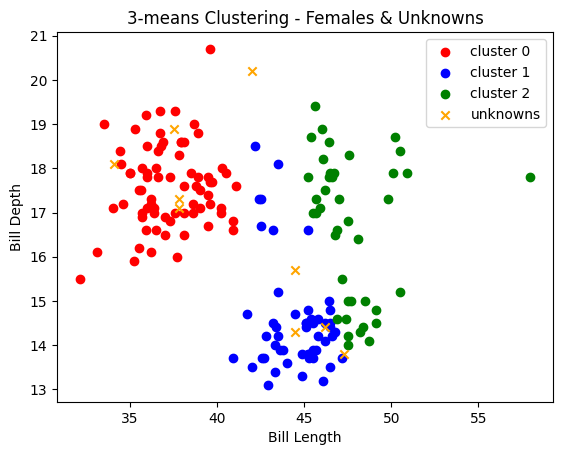

In [147]:
clusteringData_df = females_df[[key1, key2]]
assignedClusters_clust = kmeans3.fit(clusteringData_df)

# Plot the data points which in the cluster labelled '0'
plt.scatter(females_df[key1][assignedClusters_clust.labels_==0],
            females_df[key2][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(females_df[key1][assignedClusters_clust.labels_==1],
            females_df[key2][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

# Plot the data points which in the cluster labelled '2'
plt.scatter(females_df[key1][assignedClusters_clust.labels_==2],
            females_df[key2][assignedClusters_clust.labels_==2],
            color='green', marker='o', label='cluster 2')

# Add the unknowns and see if they fit in
plt.scatter(unknowns_df[key1],unknowns_df[key2],
            color='orange', marker='x', label='unknowns')


plt.legend()

plt.xlabel(key1)
plt.ylabel(key2)

plt.title('3-means Clustering - Females & Unknowns')

plt.plot()
pass

In [148]:
# What's in the assignedClusters
assignedClusters_clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2], dtype=int32)

In [149]:
# add results to females_df to see how they compare
females_df['cluster'] = assignedClusters_clust.labels_

In [150]:
females_df[females_df["Species"] == 'Adelie']

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex,cluster
0,Adelie,39.5,17.4,186.0,3800.0,FEMALE,0
1,Adelie,40.3,18.0,195.0,3250.0,FEMALE,0
2,Adelie,36.7,19.3,193.0,3450.0,FEMALE,0
3,Adelie,38.9,17.8,181.0,3625.0,FEMALE,0
4,Adelie,41.1,17.6,182.0,3200.0,FEMALE,0
...,...,...,...,...,...,...,...
68,Adelie,32.1,15.5,188.0,3050.0,FEMALE,0
69,Adelie,37.3,16.8,192.0,3000.0,FEMALE,0
70,Adelie,36.6,18.4,184.0,3475.0,FEMALE,0
71,Adelie,36.0,17.8,195.0,3450.0,FEMALE,0


In [151]:
females_df[females_df["Species"] == 'Gentoo']

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex,cluster
73,Gentoo,46.1,13.2,211.0,4500.0,FEMALE,1
74,Gentoo,48.7,14.1,210.0,4450.0,FEMALE,2
75,Gentoo,46.5,13.5,210.0,4550.0,FEMALE,1
76,Gentoo,45.4,14.6,211.0,4800.0,FEMALE,1
77,Gentoo,43.3,13.4,209.0,4400.0,FEMALE,1
78,Gentoo,40.9,13.7,214.0,4650.0,FEMALE,1
79,Gentoo,45.5,13.7,214.0,4650.0,FEMALE,1
80,Gentoo,45.8,14.6,210.0,4200.0,FEMALE,1
81,Gentoo,42.0,13.5,210.0,4150.0,FEMALE,1
82,Gentoo,46.2,14.5,209.0,4800.0,FEMALE,1


In [152]:
females_df[females_df["Species"] == 'Chinstrap']

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex,cluster
131,Chinstrap,46.5,17.9,192.0,3500.0,FEMALE,2
132,Chinstrap,45.4,18.7,188.0,3525.0,FEMALE,2
133,Chinstrap,45.2,17.8,198.0,3950.0,FEMALE,2
134,Chinstrap,46.1,18.2,178.0,3250.0,FEMALE,2
135,Chinstrap,46.0,18.9,195.0,4150.0,FEMALE,2
136,Chinstrap,46.6,17.8,193.0,3800.0,FEMALE,2
137,Chinstrap,47.0,17.3,185.0,3700.0,FEMALE,2
138,Chinstrap,45.9,17.1,190.0,3575.0,FEMALE,2
139,Chinstrap,58.0,17.8,181.0,3700.0,FEMALE,2
140,Chinstrap,46.4,18.6,190.0,3450.0,FEMALE,2


The Adelie and Chinstrap penguins are mostly in the same cluster, the Gentoos are a bit more mixed.

## Classifying the penguin data

In [153]:
from sklearn.neighbors import KNeighborsClassifier

The model for kNN is the entire training dataset. 

It is used when a prediction is required for a unseen data instance, the kNN algorithm will search through the training dataset for the k-most similar instances (Brownlee, 2020) 
- kNN uses the local neighbourhood to obtain a prediction
- Distance function used to compare the similarity: e.g., Euclidean or Manhattan
- The prediction attribute of the most similar instances is summarised and returned as the prediction for the unseen instance.
- The similarity measure is dependent on the type of data. 
- For real-valued data, the Euclidean distance can be used.
- Other types of data such as categorical or binary data, Hamming distance can be used.

The value of k can be adjusted (Cross-validation)
- Can over fit if k too low
- E.g., extracted some variations in the data (noise)
- Can under fit if k too high
- E.g., where the model does not capture the underlying structure of the data because something is missing


We'll just look at the Adelie penguin data, which we know has some records of unknown sex.

In [154]:
adelie_df = pd.read_csv('data/adelie.csv')
adelie_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


We'll split this into two dataframes, one with known sexes (training set) and one with the unknowns.

In [155]:
adelie_known_df = adelie_df[adelie_df['Sex']!='UNKNOWN'].copy()
adelie_known_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [156]:
adelie_unknown_df = adelie_df[adelie_df['Sex']=='UNKNOWN'].copy()
adelie_unknown_df

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
7,Adelie,34.1,18.1,193.0,3475.0,UNKNOWN
8,Adelie,42.0,20.2,190.0,4250.0,UNKNOWN
9,Adelie,37.8,17.1,186.0,3300.0,UNKNOWN
10,Adelie,37.8,17.3,180.0,3700.0,UNKNOWN
46,Adelie,37.5,18.9,179.0,2975.0,UNKNOWN


### Applying a 3-nn classifier

Here we will look at just two features and see whether they can be used to determine the sex of a penguin.

In [157]:
classifier_3NN = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
trainingData_df = adelie_known_df[['Bill Length', 'Bill Depth']]
targetValues_ss = adelie_known_df['Sex']
classifier_3NN.fit(trainingData_df, targetValues_ss)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [158]:
# Try with test values
testData_df = pd.DataFrame({'Bill Length':[40], 'Bill Depth':[17.5]})
testData_df

,Bill Length,Bill Depth
0,40,17.5


In [159]:
classifier_3NN.predict(testData_df)

array(['FEMALE'], dtype=object)

In [160]:
# Now try with the unknown values
testData_df = adelie_unknown_df[['Bill Length', 'Bill Depth']].copy()
testData_df

,Bill Length,Bill Depth
7,34.1,18.1
8,42.0,20.2
9,37.8,17.1
10,37.8,17.3
46,37.5,18.9


In [161]:
classifier_3NN.predict(testData_df)

array(['FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE'], dtype=object)

In [162]:
results_df = adelie_unknown_df.copy()
results_df['Sex'] = classifier_3NN.predict(testData_df)
results_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
7,Adelie,34.1,18.1,193.0,3475.0,FEMALE
8,Adelie,42.0,20.2,190.0,4250.0,MALE
9,Adelie,37.8,17.1,186.0,3300.0,FEMALE
10,Adelie,37.8,17.3,180.0,3700.0,FEMALE
46,Adelie,37.5,18.9,179.0,2975.0,MALE


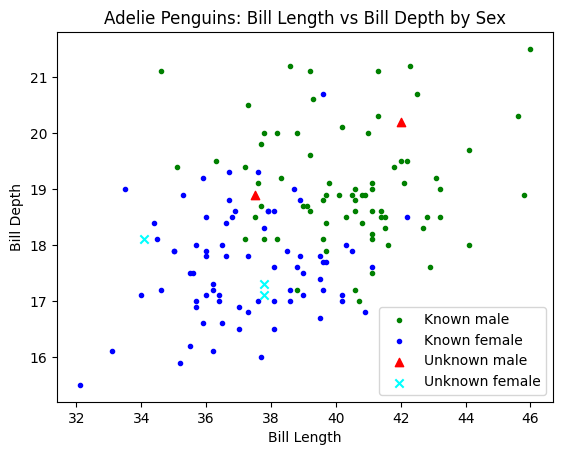

In [163]:
# Plot the data points which correspond to each penguin for two features
plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Length'],
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Depth'],
    color='green', marker='.', label='Known male')

plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Length'],
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Depth'],
    color='blue', marker='.', label='Known female')

plt.scatter(
    results_df[results_df['Sex']=='MALE']['Bill Length'],
    results_df[results_df['Sex']=='MALE']['Bill Depth'],
    color='red', marker='^', label='Unknown male')

plt.scatter(
    results_df[results_df['Sex']=='FEMALE']['Bill Length'],
    results_df[results_df['Sex']=='FEMALE']['Bill Depth'],
    color='cyan', marker='x', label='Unknown female')

plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('Adelie Penguins: Bill Length vs Bill Depth by Sex')
plt.legend()
plt.plot()
pass

Most of these look reasonable. The more central male classification is less clear.

We can try a 5-nn classifier with different features

In [164]:
classifier_5NN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
trainingData_df = adelie_known_df[['Body Mass', 'Bill Depth']]
targetValues_ss = adelie_known_df['Sex']
classifier_5NN.fit(trainingData_df, targetValues_ss)

KNeighborsClassifier(metric='euclidean')

In [165]:
testData_df = adelie_unknown_df[['Body Mass', 'Bill Depth']].copy()
results_df = adelie_unknown_df.copy()
results_df['Sex'] = classifier_5NN.predict(testData_df)
results_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
7,Adelie,34.1,18.1,193.0,3475.0,FEMALE
8,Adelie,42.0,20.2,190.0,4250.0,MALE
9,Adelie,37.8,17.1,186.0,3300.0,FEMALE
10,Adelie,37.8,17.3,180.0,3700.0,FEMALE
46,Adelie,37.5,18.9,179.0,2975.0,FEMALE


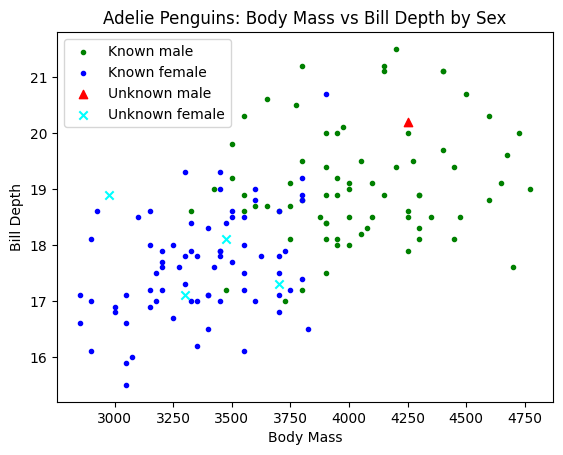

In [166]:
# Plot the data points which correspond to each penguin for two features
plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Depth'],
    color='green', marker='.', label='Known male')

plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Depth'],
    color='blue', marker='.', label='Known female')

plt.scatter(
    results_df[results_df['Sex']=='MALE']['Body Mass'],
    results_df[results_df['Sex']=='MALE']['Bill Depth'],
    color='red', marker='^', label='Unknown male')

plt.scatter(
    results_df[results_df['Sex']=='FEMALE']['Body Mass'],
    results_df[results_df['Sex']=='FEMALE']['Bill Depth'],
    color='cyan', marker='x', label='Unknown female')

plt.xlabel('Body Mass')
plt.ylabel('Bill Depth')
plt.title('Adelie Penguins: Body Mass vs Bill Depth by Sex')
plt.legend()
plt.plot()
pass

Our central male has now become female.

#### Normalisation

The two measurements in this case are very different. This can make a difference to classification. So we can normalise the data, i.e. scale it to make the range between 0 and 1.

In [167]:
trainingData_df = pd.DataFrame()

divisor = adelie_df['Body Mass'].max() - adelie_df['Body Mass'].min()
trainingData_df['mass'] = (adelie_known_df['Body Mass'] - adelie_df['Body Mass'].min())/divisor

divisor = adelie_df['Bill Depth'].max() - adelie_df['Bill Depth'].min()
trainingData_df['depth'] = (adelie_known_df['Bill Depth'] - adelie_df['Bill Depth'].min())/divisor

trainingData_df.head()

,mass,depth
0,0.467532,0.533333
1,0.493506,0.316667
2,0.207792,0.416667
3,0.311688,0.633333
4,0.415584,0.850000


In [168]:
classifier_5NN.fit(trainingData_df, targetValues_ss)

KNeighborsClassifier(metric='euclidean')

In [169]:
testData_df = pd.DataFrame()

divisor = adelie_df['Body Mass'].max() - adelie_df['Body Mass'].min()
testData_df['mass'] = (adelie_unknown_df['Body Mass'] - adelie_df['Body Mass'].min())/divisor

divisor = adelie_df['Bill Depth'].max() - adelie_df['Bill Depth'].min()
testData_df['depth'] = (adelie_unknown_df['Bill Depth'] - adelie_df['Bill Depth'].min())/divisor

testData_df.head()

,mass,depth
7,0.324675,0.433333
8,0.727273,0.783333
9,0.233766,0.266667
10,0.441558,0.300000
46,0.064935,0.566667


In [170]:
results_df = adelie_unknown_df.copy()
results_df['Sex'] = classifier_5NN.predict(testData_df)
results_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
7,Adelie,34.1,18.1,193.0,3475.0,FEMALE
8,Adelie,42.0,20.2,190.0,4250.0,MALE
9,Adelie,37.8,17.1,186.0,3300.0,FEMALE
10,Adelie,37.8,17.3,180.0,3700.0,FEMALE
46,Adelie,37.5,18.9,179.0,2975.0,FEMALE


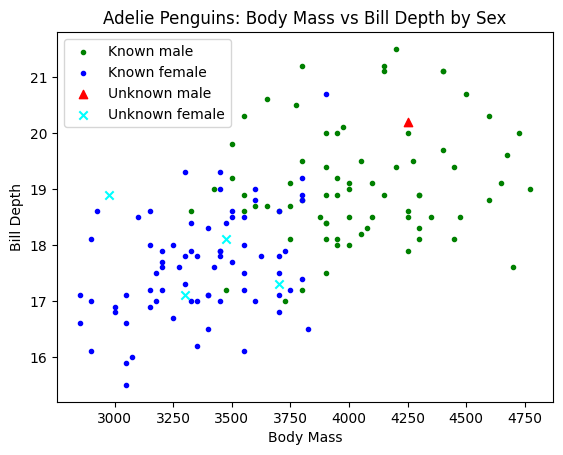

In [171]:
# Plot the data points which correspond to each penguin for two features
plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Depth'],
    color='green', marker='.', label='Known male')

plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Depth'],
    color='blue', marker='.', label='Known female')

plt.scatter(
    results_df[results_df['Sex']=='MALE']['Body Mass'],
    results_df[results_df['Sex']=='MALE']['Bill Depth'],
    color='red', marker='^', label='Unknown male')

plt.scatter(
    results_df[results_df['Sex']=='FEMALE']['Body Mass'],
    results_df[results_df['Sex']=='FEMALE']['Bill Depth'],
    color='cyan', marker='x', label='Unknown female')

plt.xlabel('Body Mass')
plt.ylabel('Bill Depth')
plt.title('Adelie Penguins: Body Mass vs Bill Depth by Sex')
plt.legend()
plt.plot()
pass

Similar results to before.

###  Leave One Out algorithm

The LOO algoithm is a way to measure the effectiveness of different values of k against known data. Exclude one item, build a classifier with the rest, then check the classification of the excluded item. Do that for all the items and for a range of k values.

In [172]:
def classify_single_case(training_df, target_ss, ix, k):
    '''Use k-NN to classify the member of trainingData_df with index
       ix using a k-nearest neighbours classifier. The classifier is
       trained on the data in trainingData_df and the classes in
       targetValues_ss, with the data point indexed by ix omitted.
       Returns the class assigned to the data point with index ix.
    '''

    # Create a classifier instance to do k-nearest neighbours
    myClassifier = KNeighborsClassifier(n_neighbors=k,
                                        metric='euclidean',
                                        weights='uniform')

    # Now apply the classifier to all data points except
    # the one indexed by ix
    train_df = trainingData_df.drop(ix, axis='index')
    tv_df = target_ss.drop(ix)
    # use values to avoid feature names error
    myClassifier.fit(train_df.values, tv_df.values)

    # Return the class predicted by the trained classifier. Need
    # to predict on list of trainingData_df.loc[ix], as predict
    # expects a list/array, rather than a single value

    return myClassifier.predict([training_df.loc[ix]])[0]

In [173]:
trainingData_df = adelie_known_df[['Bill Length', 'Bill Depth']]
targetValues_ss = adelie_known_df['Sex']

# Return the predicted value of the data point with index 3 for k=3
# the known value is FEMALE
classify_single_case(trainingData_df, targetValues_ss, 3, 3)

'MALE'

In [174]:
targetValues_ss[3]

'FEMALE'

In [175]:
# And now for k=5
classify_single_case(trainingData_df, targetValues_ss, 3, 5)

'FEMALE'

Now we run it for a range of k values.

In [176]:
for k in range(3, 30, 2):
    count = 0
    for i in trainingData_df.index:
        result = classify_single_case(trainingData_df, targetValues_ss, i, k)
        if targetValues_ss.loc[i] == result:
            count += 1
    print(k, '\t', count)

3 	 119
5 	 119
7 	 120
9 	 120
11 	 121
13 	 123
15 	 124
17 	 123
19 	 122
21 	 123
23 	 122
25 	 123
27 	 124
29 	 124


Here we might choose k=15, the smallest value of k with 124 hits

In [177]:
# And now for k=15
classifier_15NN = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
trainingData_df = adelie_known_df[['Body Mass', 'Bill Depth']]
targetValues_ss = adelie_known_df['Sex']
classifier_15NN.fit(trainingData_df, targetValues_ss)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [178]:
testData_df = adelie_unknown_df[['Body Mass', 'Bill Depth']].copy()

In [179]:
results_df = adelie_unknown_df.copy()
results_df['Sex'] = classifier_15NN.predict(testData_df)
results_df.head()

,Species,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
7,Adelie,34.1,18.1,193.0,3475.0,FEMALE
8,Adelie,42.0,20.2,190.0,4250.0,MALE
9,Adelie,37.8,17.1,186.0,3300.0,FEMALE
10,Adelie,37.8,17.3,180.0,3700.0,FEMALE
46,Adelie,37.5,18.9,179.0,2975.0,FEMALE


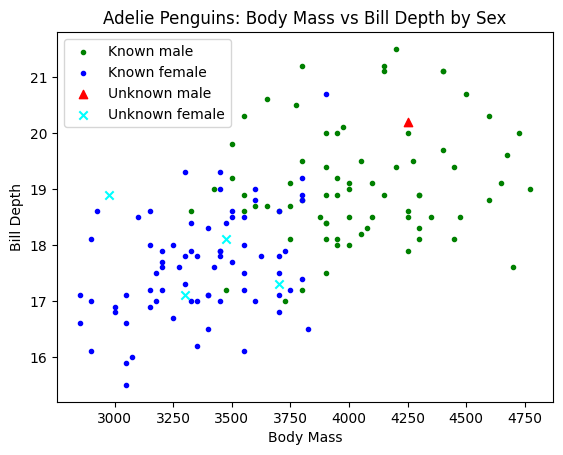

In [180]:
# Plot the data points which correspond to each penguin for two features
plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='MALE']['Bill Depth'],
    color='green', marker='.', label='Known male')

plt.scatter(
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Body Mass'],
    adelie_known_df[adelie_known_df['Sex']=='FEMALE']['Bill Depth'],
    color='blue', marker='.', label='Known female')

plt.scatter(
    results_df[results_df['Sex']=='MALE']['Body Mass'],
    results_df[results_df['Sex']=='MALE']['Bill Depth'],
    color='red', marker='^', label='Unknown male')

plt.scatter(
    results_df[results_df['Sex']=='FEMALE']['Body Mass'],
    results_df[results_df['Sex']=='FEMALE']['Bill Depth'],
    color='cyan', marker='x', label='Unknown female')

plt.xlabel('Body Mass')
plt.ylabel('Bill Depth')
plt.title('Adelie Penguins: Body Mass vs Bill Depth by Sex')
plt.legend()
plt.plot()
pass

The central unknown does seem to be female. Further investigation could be made to look at more than the body mass and bill depth.

For instance, use all four measurements, with normalised data.....

### References and licenses

Brownlee, J. (2020). Develop k-Nearest Neighbors in Python From Scratch - Machine Learning Mastery. [online] Machine Learning Mastery. Available at: http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ [Accessed 6th April 2021].

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Adélie penguins (Pygoscelis adeliae) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/98b16d7d563f265cb52372c8ca99e60f (Accessed 2021-03-26).

Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Gentoo penguin (Pygoscelis papua) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/7fca67fb28d56ee2ffa3d9370ebda689 (Accessed 2021-03-26).

Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Chinstrap penguin (Pygoscelis antarctica) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 6. Environmental Data Initiative. https://doi.org/10.6073/pasta/c14dfcfada8ea13a17536e73eb6fbe9e (Accessed 2021-03-26).

All artwork by @allison_horst